
# Project 02: Movielens Case Study

**Background of Problem Statement :**
<br>The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.
<br>**Problem Objective :**
<br>Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.
<br>**Domain:** 
Entertainment
<br>**Analysis Tasks to be performed:**
<br>1. Import the three datasets
<br>2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. 
<br>(i) Merge two tables at a time. 
<br>(ii) Merge the tables using two primary keys MovieID & UserId
<br>3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
<br>(i) User Age Distribution
<br>(ii) User rating of the movie “Toy Story”
<br>(iii) Top 25 movies by viewership rating
<br>(iv) Find the ratings for all the movies reviewed by for a particular user of user id = 2696
<br>**Feature Engineering:**
<br>Use column genres:
<br>1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
<br>2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
<br>3. Determine the features affecting the ratings of any particular movie.
<br>4. Develop an appropriate model to predict the movie ratings

**Dataset Description :**
<br>These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

In [2]:
%config IPCompleter.greedy=True
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
import warnings
warnings.filterwarnings("ignore")

#### Import the three datasets

In [4]:
#Load the data
# can use pd.read_table
movies = pd.read_csv(r'D:/Data_Science_Data/Movie Data/movies.dat', sep="::" , header=None, names=["MovieID","Title","Genres"],engine='python')
ratings = pd.read_csv(r"D:/Data_Science_Data/Movie Data/ratings.dat" , sep='::' , header=None, names =['UserID','MovieID','Rating','Timestamp'] , engine='python')
users = pd.read_csv(r"D:/Data_Science_Data/Movie Data/users.dat", sep='::' , header=None, names =['UserID','Gender','Age','Occupation','Zip-code'] , engine='python')

In [5]:
print(movies.shape)
movies.head()

(3883, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
movies.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [8]:
movies['Title'].describe()

count                      3883
unique                     3883
top       Drop Dead Fred (1991)
freq                          1
Name: Title, dtype: object

In [9]:
#Removing the year from the title in the movies file, so that we just retrieve the movie name.
#store it in a new column in the 'movies' dataframe. This will make our data manipulations easier.

movies['title_only'] = movies.Title.str[:-7]
movies['title_only']

0                         Toy Story
1                           Jumanji
2                  Grumpier Old Men
3                 Waiting to Exhale
4       Father of the Bride Part II
                   ...             
3878               Meet the Parents
3879            Requiem for a Dream
3880                      Tigerland
3881               Two Family House
3882                 Contender, The
Name: title_only, Length: 3883, dtype: object

In [10]:
print(ratings.shape)
ratings.head()

(1000209, 4)


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [12]:
ratings.groupby(['UserID','MovieID']).count()

Rating  Timestamp
UserID MovieID                   
1      1             1          1
       48            1          1
       150           1          1
       260           1          1
       527           1          1
...                ...        ...
6040   3683          1          1
       3703          1          1
       3735          1          1
       3751          1          1
       3819          1          1

[1000209 rows x 2 columns]

In [13]:
ratings['Rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [14]:
print(users.shape)
users.head()

(6040, 5)


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [16]:
users['Age'].describe()

count    6040.000000
mean       30.639238
std        12.895962
min         1.000000
25%        25.000000
50%        25.000000
75%        35.000000
max        56.000000
Name: Age, dtype: float64

In [17]:
len(set(users['UserID']))

6040

In [18]:
6040*3883

23453320

In [19]:
# Merging
tempDataset = pd.merge(ratings,movies,on='MovieID')
print(tempDataset.shape)
tempDataset.head()

(1000209, 7)


,UserID,MovieID,Rating,Timestamp,Title,Genres,title_only
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest


#### Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.
Here I created finalDF

In [20]:
finalDF = pd.merge(tempDataset, users, on='UserID')
print(finalDF.shape)
finalDF.head()

(1000209, 11)


,UserID,MovieID,Rating,Timestamp,Title,Genres,title_only,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,"Bug's Life, A",F,1,10,48067


In [21]:
# Counting values based on Movie Rating
finalDF.groupby(['Rating']).sum()

,UserID,MovieID,Timestamp,Age,Occupation
Rating,,,,,
1,167800234,110817755,54622277176071,1539828,437705
2,320205562,208381312,104631794087106,3076948,858971
3,789368925,501107422,254012338022416,7765396,2098727
4,1056656983,654499954,339307570467704,10523013,2826659
5,691112767,391123353,219872914583708,6839344,1815756


#### Explore the datasets using visual representations (graphs or tables), also include your comments 

#### 1. User Age Distribution

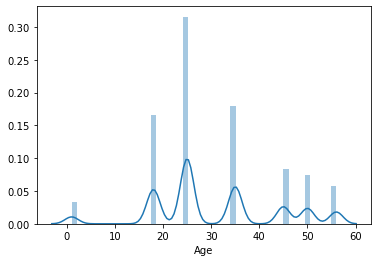

In [22]:
#User Age Distribution
sns.distplot(users.Age)

Text(0.5, 1.0, 'Age Distribution of the Users')

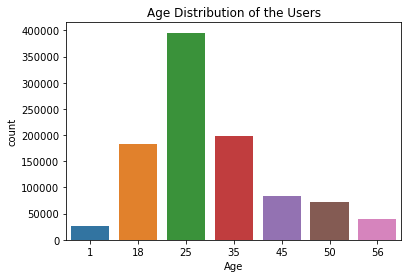

In [23]:
sns.countplot(x='Age',data = finalDF).set_title('Age Distribution of the Users')

#### 2. User rating of the movie “Toy Story”

In [24]:
finalDF[finalDF.Title.str.contains("Toy Story")]['Title'].unique()

array(['Toy Story (1995)', 'Toy Story 2 (1999)'], dtype=object)

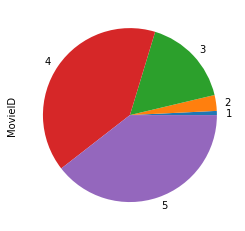

In [25]:
#finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['MovieID'].count().plot(kind="pie")
x=finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['MovieID'].count()
x.plot(kind="pie")

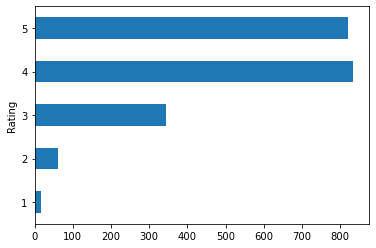

In [26]:
finalDF[finalDF.Title == 'Toy Story (1995)'].groupby('Rating')['MovieID'].count().plot(kind="barh")

###### It seems that lot of people rared 4 and 5 for the movie 'Toy Story (1995)'

In [27]:
# User rating of the movie “Toy Story”
toystoryRating = finalDF[finalDF['Title'].str.contains('Toy Story') == True] 
toystoryRating

,UserID,MovieID,Rating,Timestamp,Title,Genres,title_only,Gender,Age,Occupation,Zip-code
40,1,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy,Toy Story,F,1,10,48067
50,1,3114,4,978302174,Toy Story 2 (1999),Animation|Children's|Comedy,Toy Story 2,F,1,10,48067
417,17,3114,5,978159386,Toy Story 2 (1999),Animation|Children's|Comedy,Toy Story 2,M,50,1,95350
634,18,1,4,978154768,Toy Story (1995),Animation|Children's|Comedy,Toy Story,F,18,3,95825
938,19,1,5,978555994,Toy Story (1995),Animation|Children's|Comedy,Toy Story,M,1,10,48073
...,...,...,...,...,...,...,...,...,...,...,...
994256,1025,3114,5,975002777,Toy Story 2 (1999),Animation|Children's|Comedy,Toy Story 2,M,25,16,34677
994289,1898,3114,5,974699028,Toy Story 2 (1999),Animation|Children's|Comedy,Toy Story 2,M,25,12,91101
994315,1970,3114,4,974686535,Toy Story 2 (1999),Animation|Children's|Comedy,Toy Story 2,M,50,13,89052
994367,4741,3114,4,963267233,Toy Story 2 (1999),Animation|Children's|Comedy,Toy Story 2,M,35,7,15203


In [28]:
#User rating of the movie “Toy Story”
toystoryRating.groupby(["Title","Rating"]).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

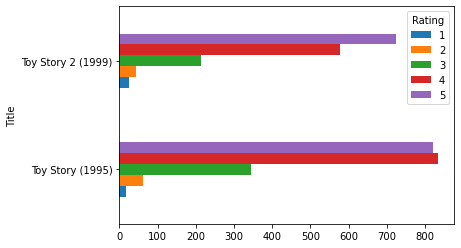

In [29]:
#Visual representations of User rating of the movie “Toy Story”
toystoryRating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True) 
plt.show()

###### It seems that lot of people rared 4 and 5 for the movie 'Toy Story (1995)' and 'Toy Story 2 (1999)'

#### 3. Top 25 movies by viewership rating

In [30]:
#top_25 = print(finalDF.groupby('Title').Rating.count().nlargest(25))
top_25 = finalDF.groupby('Title').size().sort_values(ascending=False)[:25]
top_25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

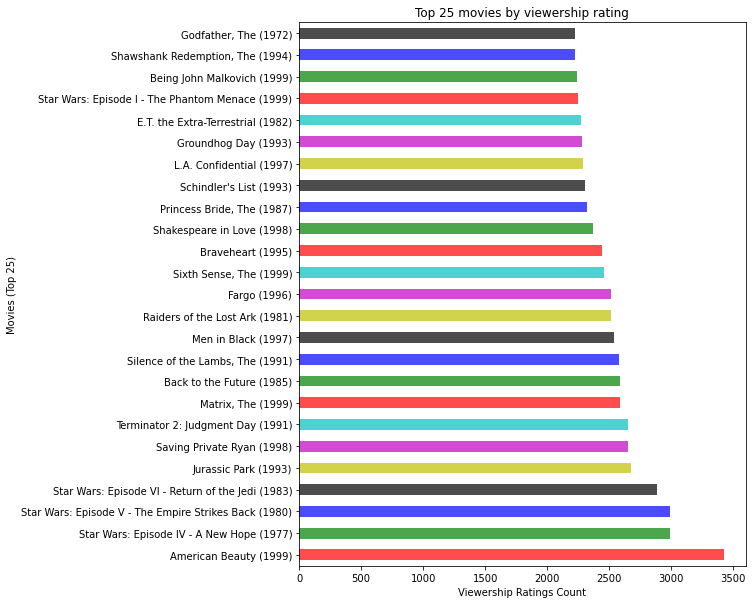

In [31]:
# Plotting Bar chart for Top 25 movies
#finalDF.groupby('Title').Rating.count().nlargest(25).plot(kind='barh')

top_25.plot(kind='barh', color=list('rgbkymc'), alpha=0.7, figsize=(8,10),stacked=False) 
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating") 
plt.show()

In [32]:
finalDF.groupby('Title').Rating.count().nsmallest(5)

Title
Aiqing wansui (1994)              1
Alley Cats, The (1968)            1
An Unforgettable Summer (1994)    1
Anna (1996)                       1
Another Man's Poison (1952)       1
Name: Rating, dtype: int64

#### 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [33]:
# Subset the dataset wehere the UserId = 2696.
user_2696 = finalDF[finalDF['UserID']==2696]
user_2696

,UserID,MovieID,Rating,Timestamp,Title,Genres,title_only,Gender,Age,Occupation,Zip-code
953847,2696,1270,2,973308676,Back to the Future (1985),Comedy|Sci-Fi,Back to the Future,M,25,7,24210
953848,2696,1097,3,973308690,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,E.T. the Extra-Terrestrial,M,25,7,24210
953849,2696,1617,4,973308842,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,L.A. Confidential,M,25,7,24210
953850,2696,800,5,973308842,Lone Star (1996),Drama|Mystery,Lone Star,M,25,7,24210
953851,2696,3386,1,973308842,JFK (1991),Drama|Mystery,JFK,M,25,7,24210
953852,2696,3176,4,973308865,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,"Talented Mr. Ripley, The",M,25,7,24210
953853,2696,1711,4,973308904,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery,Midnight in the Garden of Good and Evil,M,25,7,24210
953854,2696,1589,3,973308865,Cop Land (1997),Crime|Drama|Mystery,Cop Land,M,25,7,24210
953855,2696,1783,4,973308865,Palmetto (1998),Film-Noir|Mystery|Thriller,Palmetto,M,25,7,24210
953856,2696,1892,4,973308904,"Perfect Murder, A (1998)",Mystery|Thriller,"Perfect Murder, A",M,25,7,24210


In [34]:
user_2696.shape

(20, 11)

In [35]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
#print(finalDF[finalDF.UserID == 2696].groupby('Rating')['MovieID'].count())
print(user_2696.groupby('Rating')['MovieID'].count())

Rating
1     2
2     3
3     3
4    11
5     1
Name: MovieID, dtype: int64


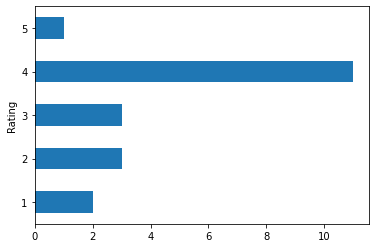

In [36]:
# Bar plot for above solution
#finalDF[finalDF.UserID == 2696].groupby('Rating')['MovieID'].count().plot(kind='barh')
user_2696.groupby('Rating')['MovieID'].count().plot(kind='barh')

Text(0.5, 1.0, 'Ratings for movies by user 2696')

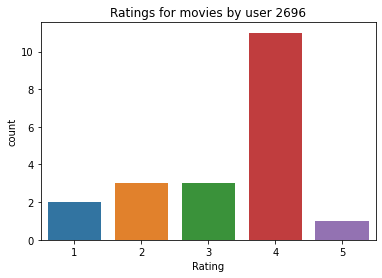

In [37]:
# Plotting the ratings given by the user 2696
sns.countplot(x='Rating',data = user_2696).set_title('Ratings for movies by user 2696')

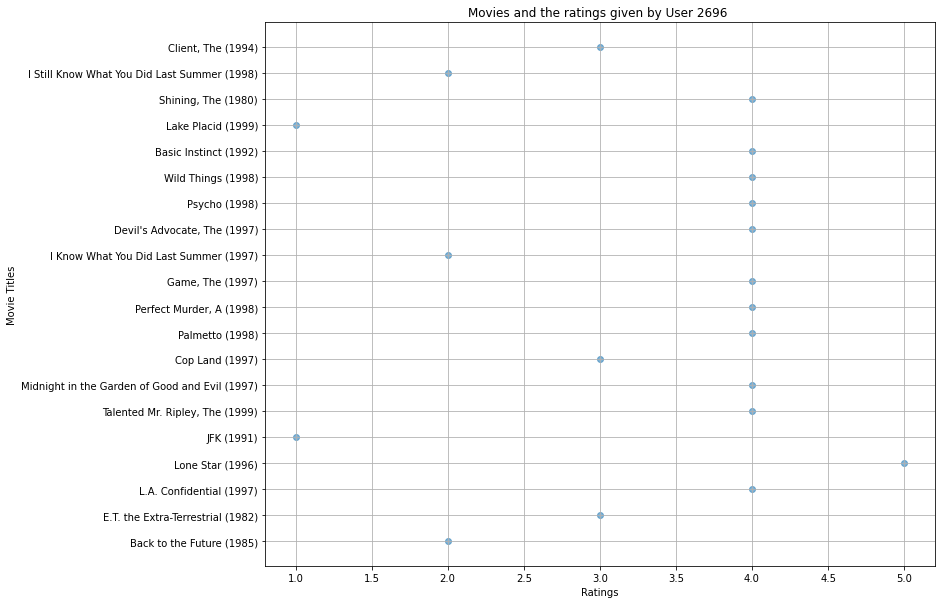

In [39]:
# Creating a scatter plot for the movies reviewed by the user 2696.
plt.figure(figsize=(12,10))
plt.scatter(user_2696.Rating,user_2696.Title, alpha=.55)
plt.title("Movies and the ratings given by User 2696 ")
plt.ylabel("Movie Titles")
plt.xlabel("Ratings")
plt.grid(b=True,which='major')
plt.show()

### Feature Engineering:Use column genres:

#### 1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [40]:
finalDF.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,title_only,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,"Bug's Life, A",F,1,10,48067


In [41]:
# split the data in column genre making a list
finalDF.Genres.str.split('|').tolist()[:5]

[['Drama'],
 ['Animation', "Children's", 'Musical'],
 ['Musical', 'Romance'],
 ['Drama'],
 ['Animation', "Children's", 'Comedy']]

In [42]:
#Find out all the unique genres
list1 = finalDF.Genres.str.split('|').tolist()
finalList = []
for i in list1:
    for j in i:
        finalList.append(j)

list(set(finalList))

['Action',
 'Animation',
 'Fantasy',
 'War',
 'Comedy',
 'Western',
 'Horror',
 "Children's",
 'Sci-Fi',
 'Drama',
 'Crime',
 'Adventure',
 'Film-Noir',
 'Mystery',
 'Thriller',
 'Romance',
 'Documentary',
 'Musical']

In [43]:
finalDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Title       1000209 non-null  object
 5   Genres      1000209 non-null  object
 6   title_only  1000209 non-null  object
 7   Gender      1000209 non-null  object
 8   Age         1000209 non-null  int64 
 9   Occupation  1000209 non-null  int64 
 10  Zip-code    1000209 non-null  object
dtypes: int64(6), object(5)
memory usage: 91.6+ MB


#### 2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [44]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) 
finalOHEDF = pd.concat([finalDF.Genres.str.get_dummies('|') , finalDF.iloc[:,[0,1,3,4,5,6,7,8,9]]] , axis=1)

In [45]:
finalOHEDF.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Western,UserID,MovieID,Timestamp,Title,Genres,title_only,Gender,Age,Occupation
0,0,0,0,0,0,0,0,1,0,0,...,0,1,1193,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10
1,0,0,1,1,0,0,0,0,0,0,...,0,1,661,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10
2,0,0,0,0,0,0,0,0,0,0,...,0,1,914,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,F,1,10
3,0,0,0,0,0,0,0,1,0,0,...,0,1,3408,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,F,1,10
4,0,0,1,1,1,0,0,0,0,0,...,0,1,2355,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,"Bug's Life, A",F,1,10


#### 3. Determine the features affecting the ratings of any particular movie.

In [46]:
#Determine the features affecting the ratings of any particular movie.
#
# Hint: Perform Chi-sqaure test between Xfeature v/s ratings ---- To do feature elimination
#
# and finalize your feature
#
# final numpy array called 'feature'

from scipy.stats import chi2_contingency

ctTitle = pd.crosstab(finalDF.Title,finalDF.Rating)
ctGenres = pd.crosstab(finalDF.Genres,finalDF.Rating)
ctGender = pd.crosstab(finalDF.Gender,finalDF.Rating)
ctAge = pd.crosstab(finalDF.Age,finalDF.Rating)
ctOccupation = pd.crosstab(finalDF.Occupation,finalDF.Rating)
ctZipCode = pd.crosstab(finalDF['Zip-code'],finalDF.Rating)

In [47]:
ctTitle.index.name

'Title'

In [51]:
ctGender

Rating,1,2,3,4,5
Gender,,,,,
F,13347,24548,62966,87033,58546
M,42827,83009,198231,261938,167764


In [52]:
from scipy.stats import chi2_contingency

list1 = [ctTitle,ctGenres,ctGender,ctAge,ctOccupation,ctZipCode]

for i in list1:
    stat,pvalue,dof,expected_R = chi2_contingency(i)
    if pvalue <= 0.05:
        print(pvalue)
        print("Alternate Hypothesis passed. {} and Rating have Relationship".format(i.index.name))
    else:
        print("Null hypothesis passed. {} and Profit doesnot have  Relationship".format(i.index.name))

0.0
Alternate Hypothesis passed. Title and Rating have Relationship
0.0
Alternate Hypothesis passed. Genres and Rating have Relationship
2.348561132924984e-97
Alternate Hypothesis passed. Gender and Rating have Relationship
0.0
Alternate Hypothesis passed. Age and Rating have Relationship
0.0
Alternate Hypothesis passed. Occupation and Rating have Relationship
0.0
Alternate Hypothesis passed. Zip-code and Rating have Relationship


In [50]:
finalDF.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,title_only,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,One Flew Over the Cuckoo's Nest,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,James and the Giant Peach,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,My Fair Lady,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,Erin Brockovich,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,"Bug's Life, A",F,1,10,48067


In [51]:
finalDF.groupby(['Title','Rating']).size()

Title                   Rating
$1,000,000 Duck (1971)  1           3
                        2           8
                        3          15
                        4           7
                        5           4
                                 ... 
eXistenZ (1999)         1          43
                        2          61
                        3         109
                        4         142
                        5          55
Length: 16912, dtype: int64

In [52]:
dfGenderAffecting = finalDF.groupby('Gender').size().sort_values(ascending=False)[:25] 
dfGenderAffecting

Gender
M    753769
F    246440
dtype: int64

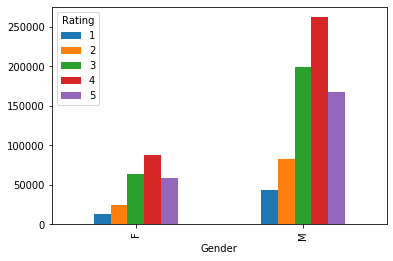

In [53]:
finalDF.groupby(['Gender','Rating']).size().unstack().plot(kind='bar',stacked=False,legend=True) 
plt.show()

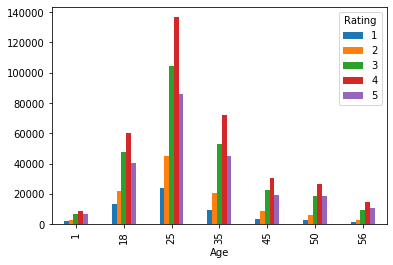

In [54]:
finalDF.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True) 
plt.show()

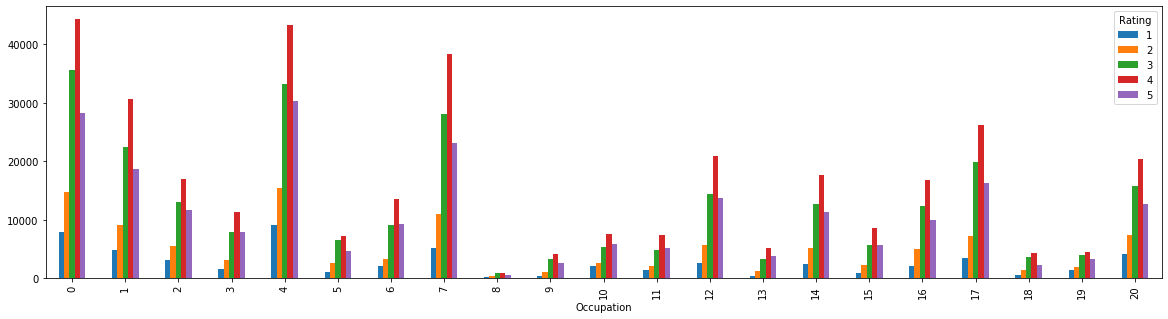

In [55]:
finalDF.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True, figsize=(20,5)) 
plt.show()

#### 4. Develop an appropriate model to predict the movie ratings

In [54]:
# using above found feature numpy array and rating as label

features = finalDF.iloc[:,[1,6,7,8]]
label = finalDF.Rating

In [55]:
features.head()

,MovieID,title_only,Gender,Age
0,1193,One Flew Over the Cuckoo's Nest,F,1
1,661,James and the Giant Peach,F,1
2,914,My Fair Lady,F,1
3,3408,Erin Brockovich,F,1
4,2355,"Bug's Life, A",F,1


In [56]:
label.head()

0    5
1    3
2    3
3    4
4    5
Name: Rating, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder

stateLabelEncoder = LabelEncoder()
features.iloc[:,0] = stateLabelEncoder.fit_transform(features.iloc[:,0])
features.iloc[:,1] = stateLabelEncoder.fit_transform(features.iloc[:,1])
features.iloc[:,2] = stateLabelEncoder.fit_transform(features.iloc[:,2])

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
titleLe = LabelEncoder()
genderLe = LabelEncoder()
features[:,0] = titleLe.fit_transform(features[:,0])
features[:,1] = genderLe.fit_transform(features[:,1])
features
ohe = OneHotEncoder(categorical_features=[0,1])
features = ohe.fit_transform(features).toarray()

In [68]:
features.head(5)

,MovieID,title_only,Gender,Age
0,1104,2422,0,1
1,639,1724,0,1
2,853,2261,0,1
3,3177,1048,0,1
4,2162,555,0,1


In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state = 1)

In [74]:
# K Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)
knn_predictions = knn_model.predict(X_test)  
acc_knn = round(knn_model.score(X_train,y_train) * 100, 2)
acc_knn

33.52

In [75]:
# creating a confusion matrix 
from sklearn.metrics import confusion_matrix 

cm_knn = confusion_matrix(y_test, knn_predictions) 

In [76]:
knn_predictions

array([4, 5, 2, ..., 2, 1, 3], dtype=int64)

In [77]:
cm_knn

array([[ 3305,  2572,  2843,  1872,   638],
       [ 4009,  4671,  6585,  4648,  1567],
       [ 6225,  9395, 16553, 14360,  5666],
       [ 5458,  9884, 20399, 22050, 11926],
       [ 2465,  4632, 10984, 14260, 13075]], dtype=int64)

In [78]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
dt_predict= decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train,y_train) * 100, 2)
acc_decision_tree

44.87

In [80]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train,y_train)
acc_random_forest = round(random_forest.score(X_train,y_train) * 100, 2)
acc_random_forest

44.63

In [81]:
# Logistic Regression

logreg = LogisticRegression() 
logreg.fit(X_train, y_train) 
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2) 
acc_log

34.89

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train) 
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2) 
acc_svc

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train) 
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2) 
acc_gaussian

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train) 
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2) 
acc_perceptron

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train) 
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2) 
acc_linear_svc 

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train) 
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd 

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False) 

## <center>----- Thank You -----</center>